In [154]:
using Pkg, Revise, VegaLite
Pkg.activate("../.")
using LightGraphs, GraphPlot, SimpleWeightedGraphs, LinearAlgebra, DataFrames, Random, Colors
using VegaGraphs

 Activating environment at `~/MEGAsync/EMAp/VegaGraphs/Project.toml`


In [155]:
Random.seed!(7)
df = DataFrame(rand([0,1],10,20));

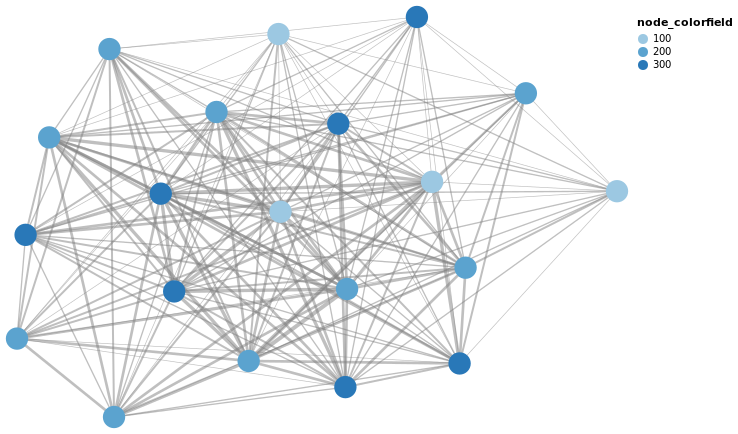

In [156]:
VegaGraphs.graphplot(df,tooltip=true,node_label=false,node_colorfield=rand([100,200,300],20))
# VegaGraphs.graphplot(df,tooltip=true,node_label=false)

In [93]:
function test(;kwargs...)
    return kwargs
end

test (generic function with 1 method)

In [48]:
n = test(node_sizefield=rand(10))

pairs(::NamedTuple) with 1 entry:
  :node_sizefield => [0.962181, 0.352891, 0.197407, 0.0275658, 0.695998, 0.6362…

In [69]:
kk = 0
for (k,v) in n
    kk = v
end

In [141]:
for (k,v) in Dict(:node_sizefield=>1,:node_sie=>3)
    println(k)
end

node_sizefield
node_sie


In [89]:
df[:new] = rand(10)

10-element Array{Float64,1}:
 0.3550497536381618
 0.6774365102900426
 0.827343244706443
 0.11066079229683257
 0.44028805050404807
 0.5004067791777393
 0.23818199074778512
 0.2376902594906911
 0.27969216786696616
 0.708809656597365

In [88]:
df[:new]

10-element Array{Float64,1}:
 0.4969253972196168
 0.6222109083793195
 0.6312928676991856
 0.8143215365093088
 0.7432801760828582
 0.966335514559246
 0.531880095390376
 0.9765991104892204
 0.9018230702090304
 0.33054881659455426